In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
filename = "team_stats.csv"
drop_list = ["RK", "TOTAL_DVOA", "LAST_YEAR", "WEI_DVOA", "RANK", "W-L", "YEAR"]


In [3]:
df = pd.read_csv(filename).set_index("TEAM")
test = df.drop(drop_list, axis=1)
test = test.iloc[1:]
k = 4

#df = df.drop(df.columns[[df.iloc[0]==1]], axis=1)
test.head(5)

,OFFENSE_DVOA,OFF_RANK,DEFENSE_DVOA,DEF_RANK,ST_DVOA,ST_RANK
TEAM,,,,,,
KC,0.34,1,0.07,26,0.06,2
LAR,0.25,2,0.01,17,0.00,17
LAC,0.21,3,-0.05,8,-0.03,25
NO,0.16,4,-0.03,11,0.02,9
CHI,-0.03,20,-0.26,1,-0.03,26


In [4]:
df.head(5)

,RK,TOTAL_DVOA,LAST_YEAR,WEI_DVOA,RANK,W-L,OFFENSE_DVOA,OFF_RANK,DEFENSE_DVOA,DEF_RANK,ST_DVOA,ST_RANK,YEAR
TEAM,,,,,,,,,,,,,
2,2,1.00,1,1.00,1,0,1.00,1,1.00,1,1.00,1,1
KC,1,0.33,10,0.31,1,12-4,0.34,1,0.07,26,0.06,2,2018
LAR,2,0.24,2,0.20,6,13-3,0.25,2,0.01,17,0.00,17,2018
LAC,3,0.23,11,0.24,3,12-4,0.21,3,-0.05,8,-0.03,25,2018
NO,4,0.21,1,0.26,2,13-3,0.16,4,-0.03,11,0.02,9,2018


In [5]:
test.head(5)

,OFFENSE_DVOA,OFF_RANK,DEFENSE_DVOA,DEF_RANK,ST_DVOA,ST_RANK
TEAM,,,,,,
KC,0.34,1,0.07,26,0.06,2
LAR,0.25,2,0.01,17,0.00,17
LAC,0.21,3,-0.05,8,-0.03,25
NO,0.16,4,-0.03,11,0.02,9
CHI,-0.03,20,-0.26,1,-0.03,26


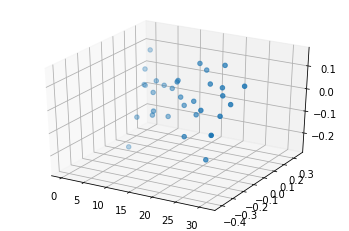

In [6]:
#plot for expected columns
x_labels = list(test.index.values)
x = list(range(len(x_labels)))
y = list(test["OFFENSE_DVOA"])
z = list(test["DEFENSE_DVOA"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

plt.show()


In [7]:
def euclidean_distance(df, x):
    return np.sqrt(np.sum(np.square(df - x), axis=1))

In [8]:
def kmeans(df, k):
    # Compute initial centroids
    D = df.apply(lambda x : euclidean_distance(df, x), axis=1)
    max_point = D.max().idxmax()
    initial_centroids = [max_point, D.idxmax()[max_point]]
    for _ in range(k-2):
        next_centroid = D[initial_centroids].drop(initial_centroids).sum(axis=1).idxmax()
        initial_centroids.append(next_centroid)
    df['cluster'] = D[initial_centroids].idxmin(axis=1)
    centroids = df.groupby('cluster').mean()
    centroids.index = range(k)

    # Assign Points to inital Centroids
    point_centroid_dists = df.apply(lambda x : euclidean_distance(centroids, x), axis=1)
    SSE = point_centroid_dists.min(axis=1).sum()
    df['cluster'] = point_centroid_dists.idxmin(axis=1)

    # Perform K-Means Clustering
    stop_criteria = False
    prev_centroids = None
    prev_point_assignment = None
    prev_SSE = 0
    SSE_thresh = 0.01
    while not stop_criteria:
        # Save current values
        prev_centroids = centroids.copy()
        prev_point_assignment = df['cluster'].copy()
        SSE_prev = SSE
    
        # Recalculate centroids
        centroids = df.groupby('cluster').mean()
        point_centroid_dists = df.apply(lambda x : euclidean_distance(centroids, x), axis=1)
        df['cluster'] = point_centroid_dists.idxmin(axis=1)
    
        # Check Stopping Conditions
        no_point_reassign = df['cluster'].equals(prev_point_assignment)
        no_centroid_reassign =  centroids.equals(prev_centroids)
        SSE = point_centroid_dists.min(axis=1).sum()
        no_SSE_decrease = (SSE - prev_SSE) / SSE < SSE_thresh
        stop_criteria = no_point_reassign or no_centroid_reassign or no_SSE_decrease

    clustering = []
    for team, row in df.iterrows():
        clustering += [(team, int(row["cluster"]))]
    
    return clustering 
    """# Print Results
    for centroid, center in centroids.iterrows():
        cluster_points = df.cluster[df.cluster==centroid].index.values
        cluster_dists = point_centroid_dists[centroid][cluster_points]
        print('Cluster', centroid)
        print('Center', center.values)
        print('Max Dist. to Center:', cluster_dists.max())
        print('Min Dist. to Center:', cluster_dists.min())
        print('Avg Dist. to Center:', cluster_dists.mean())
        print('Sum of Squared Errors:', SSE)
        print(len(cluster_points), 'Points')
        print(df[df.cluster==centroid].drop('cluster', axis=1))
        print()"""

In [9]:
clustering = kmeans(test,k)
clustering

[('KC', 2),
 ('LAR', 2),
 ('LAC', 1),
 ('NO', 2),
 ('CHI', 0),
 ('BAL', 3),
 ('NE', 2),
 ('IND', 2),
 ('PIT', 1),
 ('MIN', 0),
 ('HOU', 3),
 ('SEA', 1),
 ('DEN', 0),
 ('CAR', 1),
 ('NYG', 2),
 ('PHI', 3),
 ('CLE', 0),
 ('ATL', 2),
 ('GB', 1),
 ('TEN', 3),
 ('DAL', 0),
 ('JAX', 3),
 ('CIN', 3),
 ('TB', 1),
 ('NYJ', 3),
 ('DET', 1),
 ('MIA', 3),
 ('BUF', 0),
 ('WAS', 3),
 ('SF', 3),
 ('OAK', 1),
 ('ARI', 3)]

In [26]:
def print_cluster_statistics(df, test, clustering):
    team, clusters = map(list,zip(*clustering))
    test["cluster"] = clusters
    test["rank"] = df["RANK"]

    means = test.groupby("cluster").mean()

    #out_cols = means.columns
    out_cols = ["rank","OFF_RANK", "DEF_RANK", "ST_RANK"]
    for cluster, row in means.iterrows():
        print("Cluster: {}".format(cluster))
        for col in out_cols:
            print("\tMEAN {}: {}".format(col, row[col]))


In [27]:
print_cluster_statistics(df,test,clustering)

Cluster: 0
	MEAN rank: 13.166666666666666
	MEAN OFF_RANK: 20.666666666666668
	MEAN DEF_RANK: 5.5
	MEAN ST_RANK: 26.833333333333332
Cluster: 1
	MEAN rank: 17.75
	MEAN OFF_RANK: 12.0
	MEAN DEF_RANK: 22.0
	MEAN ST_RANK: 24.125
Cluster: 2
	MEAN rank: 7.571428571428571
	MEAN OFF_RANK: 6.142857142857143
	MEAN DEF_RANK: 19.285714285714285
	MEAN ST_RANK: 9.857142857142858
Cluster: 3
	MEAN rank: 23.09090909090909
	MEAN OFF_RANK: 24.09090909090909
	MEAN DEF_RANK: 16.727272727272727
	MEAN ST_RANK: 9.545454545454545


[2, 2, 1, 2, 0, 3, 2, 2, 1, 0, 3, 1, 0, 1, 2, 3, 0, 2, 1, 3, 0, 3, 3, 1, 3, 1, 3, 0, 3, 3, 1, 3]


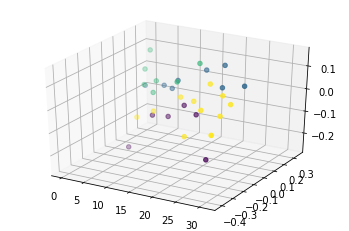

In [12]:
#plot for expected columns
x_labels = list(test.index.values)
x = list(range(len(x_labels)))
y = list(test["OFFENSE_DVOA"])
z = list(test["DEFENSE_DVOA"])

colors = []
for _, cluster in clustering:
    colors += [cluster]
print(colors)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors)

plt.show()